In [2]:
from google.colab import drive ;
drive.mount('/content/drive') ;

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/autoEncoderCNN_colorizer_augmented_linnaeus5.h5') ;
denoise = load_model('/content/drive/MyDrive/autoEncoderCNN_denoiser_linnaeus5.h5') ;
print(model.summary()) ;

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 Downsampler_1 (Sequential)  (None, 64, 64, 128)          1280      ['input_1[0][0]']             
                                                                                                  
 Downsampler_2 (Sequential)  (None, 32, 32, 128)          148096    ['Downsampler_1[0][0]']       
                                                                                                  
 Downsampler_3 (Sequential)  (None, 16, 16, 256)          296192    ['Downsampler_2[0][0]']       
                                                                                              

In [4]:
import cv2 ;
import numpy as np ;
import matplotlib.pyplot as plt ;
import matplotlib.image as mpimg ;

In [5]:
def rgb2gray(rgb):
    value = np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140]) ;
    return value ;

In [25]:
def demo(imagePath, model, denoise):
  image = np.array(mpimg.imread(imagePath), dtype=np.float32) ;
  if '.jpg' in imagePath or '.jpeg' in imagePath:
    image = image/255 ;
  image = rgb2gray(image) ;
  image = cv2.resize(image, (128,128)) ;
  image = image.reshape((1,128,128,1)) ;
  colored = np.clip(model.predict(image), 0.0, 1.0) ;
  denoised = np.clip(denoise.predict(colored), 0.0, 1.0) ;
  figure, axes = plt.subplots(nrows=1, ncols=3, figsize=(9,3)) ;
  axes[0].imshow(image.reshape((128,128)), cmap='gray') ;
  axes[1].imshow(colored[0]) ;
  axes[2].imshow(denoised[0]) ;
  plt.show() ;

1/1 [==============================] - 0s 81ms/step


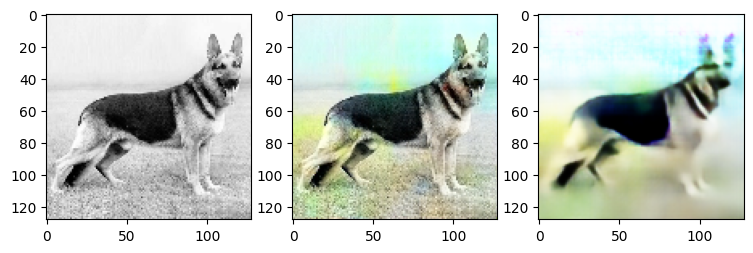

1/1 [==============================] - 0s 66ms/step


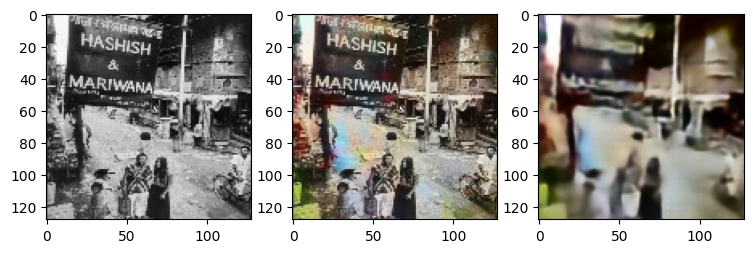

1/1 [==============================] - 0s 69ms/step


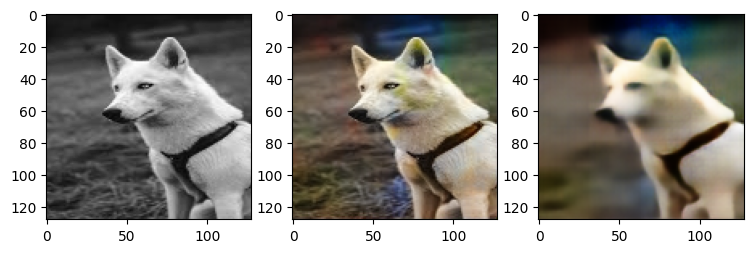

1/1 [==============================] - 0s 77ms/step


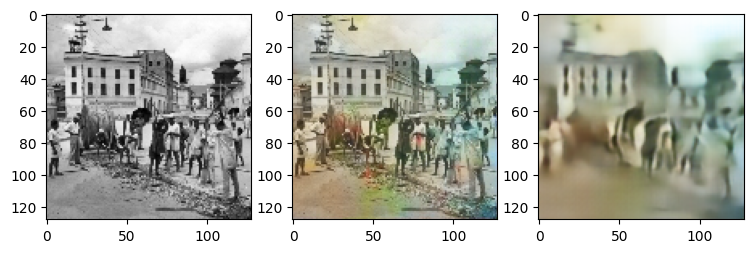

1/1 [==============================] - 0s 69ms/step


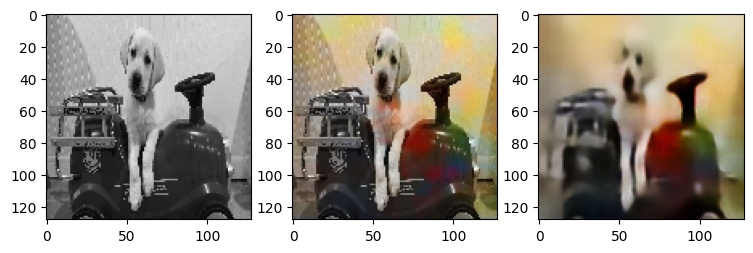

1/1 [==============================] - 0s 79ms/step


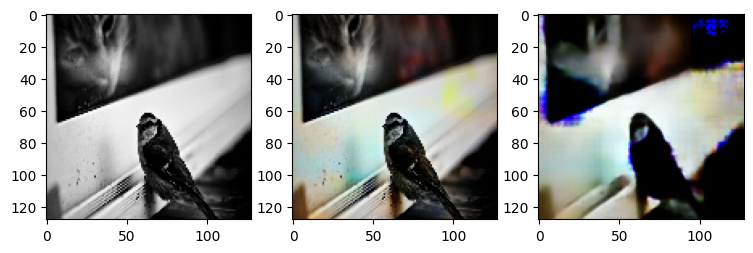

1/1 [==============================] - 0s 78ms/step


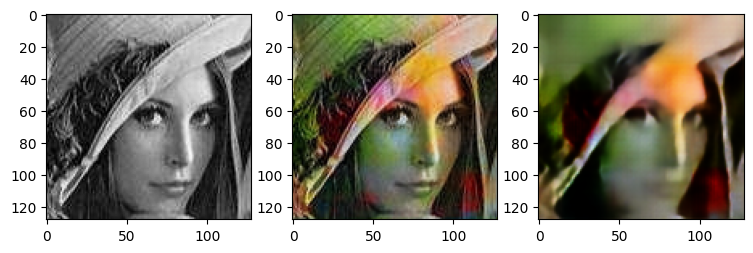

1/1 [==============================] - 0s 68ms/step


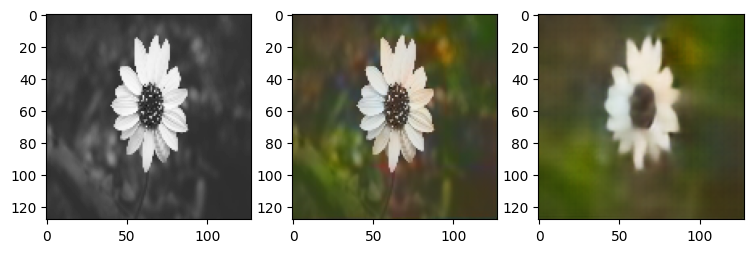

1/1 [==============================] - 0s 69ms/step


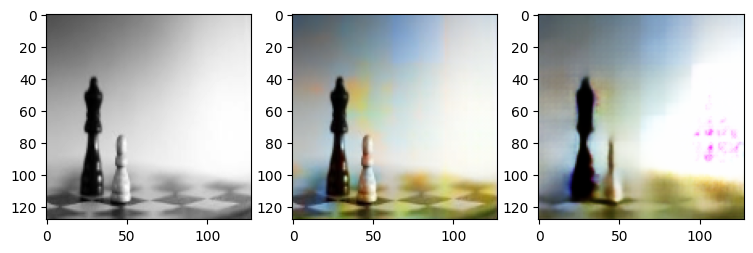

1/1 [==============================] - 0s 77ms/step


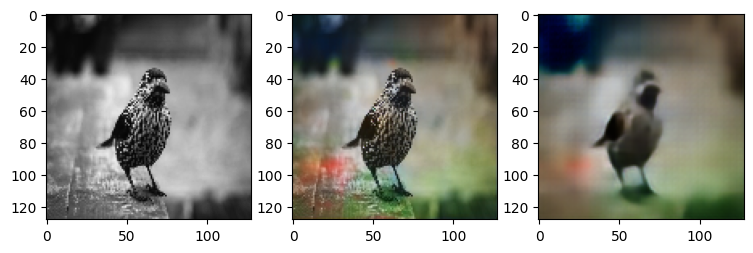

1/1 [==============================] - 0s 131ms/step


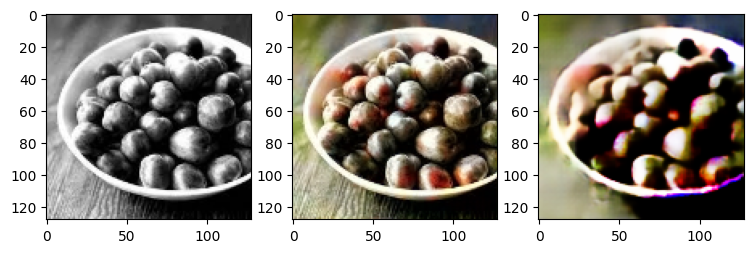

1/1 [==============================] - 0s 126ms/step


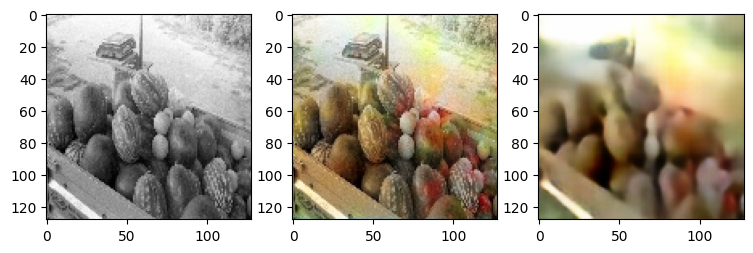

In [37]:
images = ['gsd.jpg', 'asan_nepal.jpg', 'husky.jpeg', 'construction_Nepal.jpg', 'doggo.jpg', 'sea.jpeg', 'lena128*128.png', 'flower.jpeg', 'chess.jpeg', 'bird.jpeg', 'grapes.jpeg', 'melon.jpeg'] ;
for image in images:
  demo(image, model, denoise) ;